<a href="https://colab.research.google.com/github/vaibhav639/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
my_path = '/content/drive/MyDrive/csv files/Airbnb NYC 2019.csv'
df = pd.read_csv(my_path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


# 1. Top 10 private room listing by an unique host

In [9]:
pvt = df[df['room_type']=='Private room']
list_pvt = pvt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_pvt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,private
15261,190921808,John,Hell's Kitchen,Manhattan,44
14025,137358866,Kazuya,Woodside,Queens,35
16301,238321374,Eyal,Upper West Side,Manhattan,32
15984,224414117,Gabriel,Hell's Kitchen,Manhattan,30
16035,226410657,Nina,Bedford-Stuyvesant,Brooklyn,26
16144,230192510,Zach,Fort Greene,Brooklyn,25
16386,242962235,Yuval,Ridgewood,Queens,23
16539,252604696,Erin,Chelsea,Manhattan,20
15761,216235179,Nina,Bushwick,Brooklyn,17
14024,137358866,Kazuya,Sunnyside,Queens,17


# 2. Neighbourhood Group

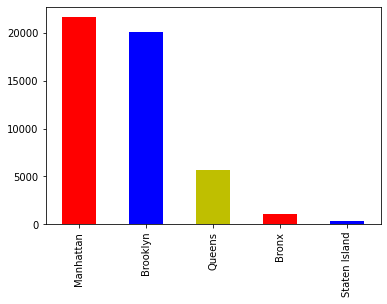

In [10]:
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y',])
plt.show()

# 3. Which neighbourhood has the highest listing ?

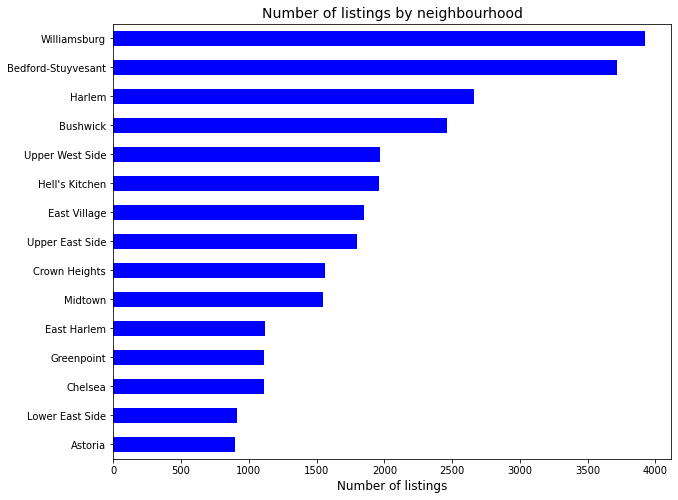

In [11]:
feq = df['neighbourhood'].value_counts().sort_values(ascending=True)
feq = feq[-15:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

# 4. Types of rooms

In [12]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 0, 'type of rooms')

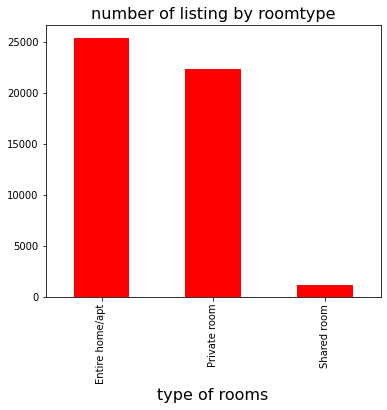

In [13]:
freq = df['room_type'].value_counts().sort_values(ascending = False)
freq.plot(kind = 'bar' , color = 'r', figsize = (6,5))
plt.title('number of listing by roomtype', fontsize = 16)
plt.xlabel('type of rooms', fontsize = 16)

# 5. Top 10 Host

Text(0.5, 1.0, 'Top Host')

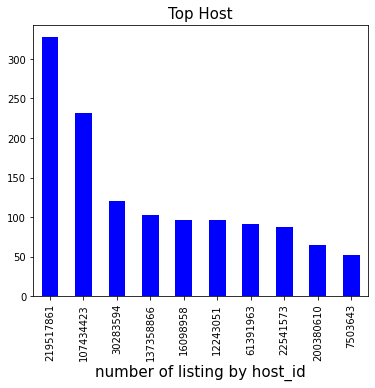

In [14]:
top_host = df['host_id'].value_counts().head(10)
top_host.plot(kind = 'bar', color = 'b', figsize = (6,5))
plt.xlabel('number of listing by host_id', fontsize = 15)
plt.title('Top Host', fontsize = 15 )

# 6. which host stay maximum nights 

In [15]:
#find index of maximum night in colomn 'minimum_nights.
print(df['minimum_nights'].idxmax())

5767


In [16]:
df['host_name'].loc[df['minimum_nights'].idxmax()]

'Genevieve'

# 7. which hotel which have maximum price 

In [17]:
# find index of maximum price in colomn "price"`
print(df['price'].idxmax())

9151


In [18]:
df['name'].loc[df['price'].idxmax()]

'Furnished room in Astoria apartment'

# 8. Analysis Reviews by graph.

In [19]:
freq1 = df['number_of_reviews'].value_counts().sort_values(ascending = False).head(30)

Text(0, 0.5, 'no. of reviews')

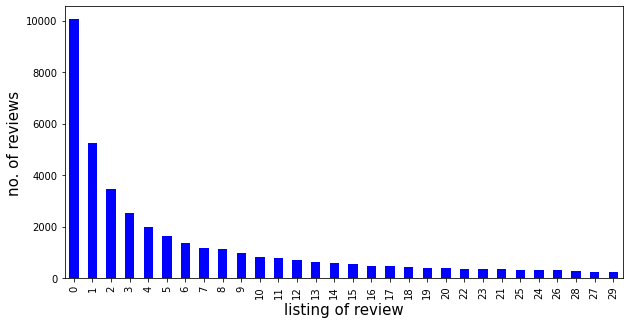

In [20]:
freq1.plot(kind = 'bar', color = 'b', figsize = (10,5))
plt.xlabel('listing of review', fontsize = 15)
plt.ylabel('no. of reviews', fontsize = 15)

#9.  Neighbourhood Group vs. Availability Room

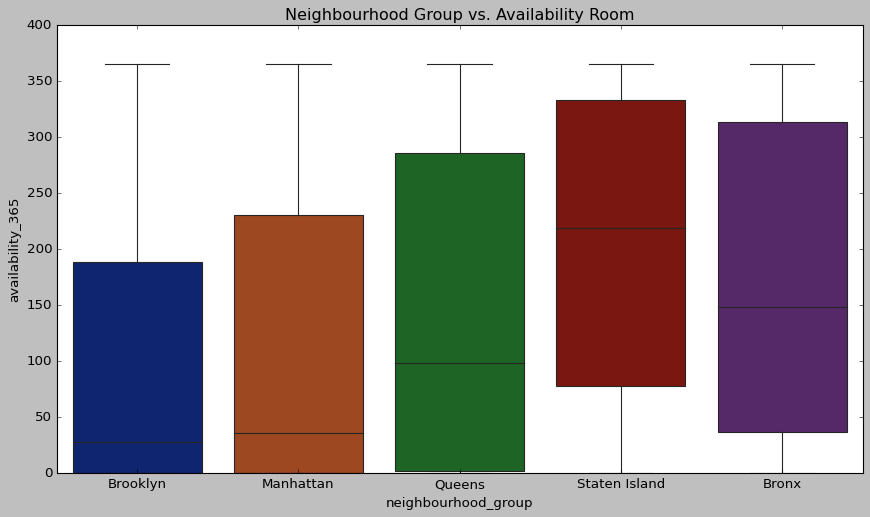

In [21]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df , x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

# 10. Neighbourhood Group Price Distribution

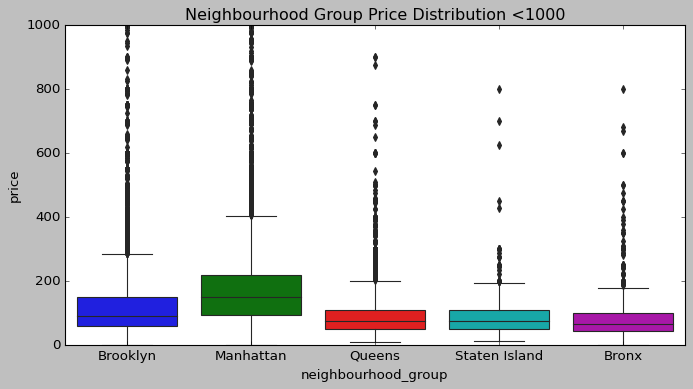

In [22]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group Price Distribution <1000")
sns.boxplot(y="price",x ='neighbourhood_group',data = df[df.price<1000])
plt.show()

# 11. **Price Prediction**
Let’s see the correlation between the columns.

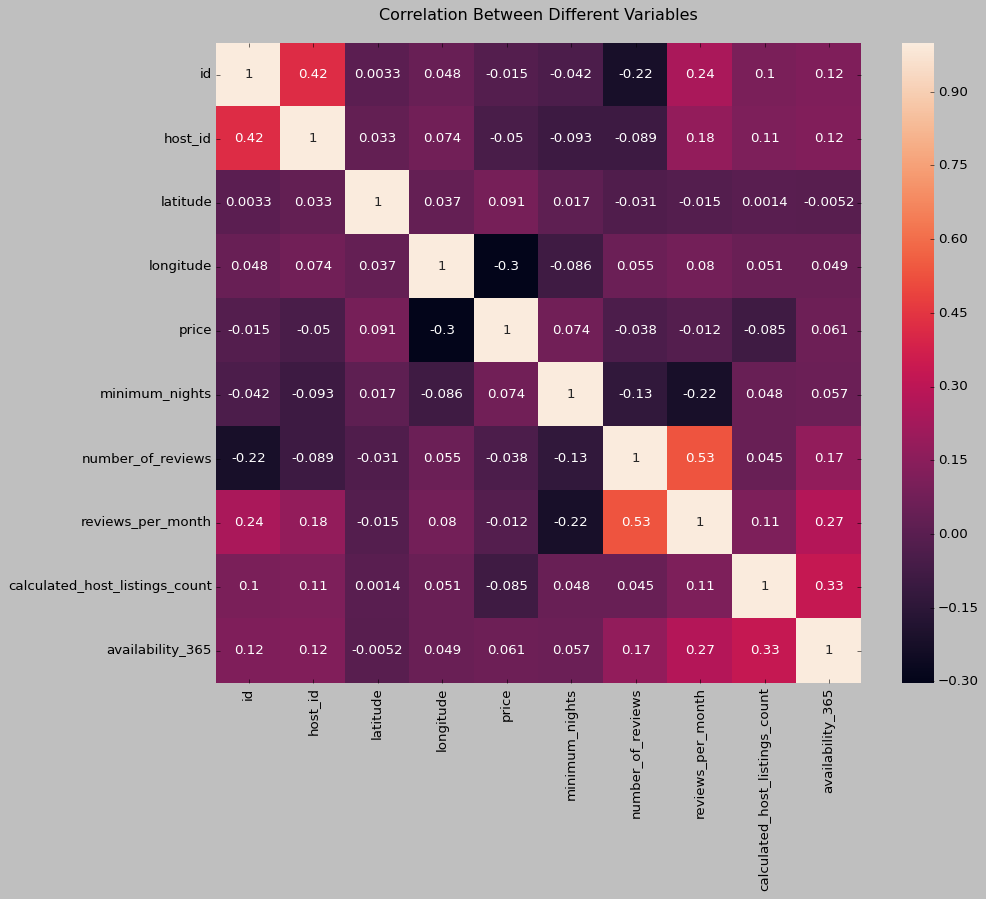

In [23]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

# 12. Scatter Plot to show the neighbourhood group based on Latitude and Longitude



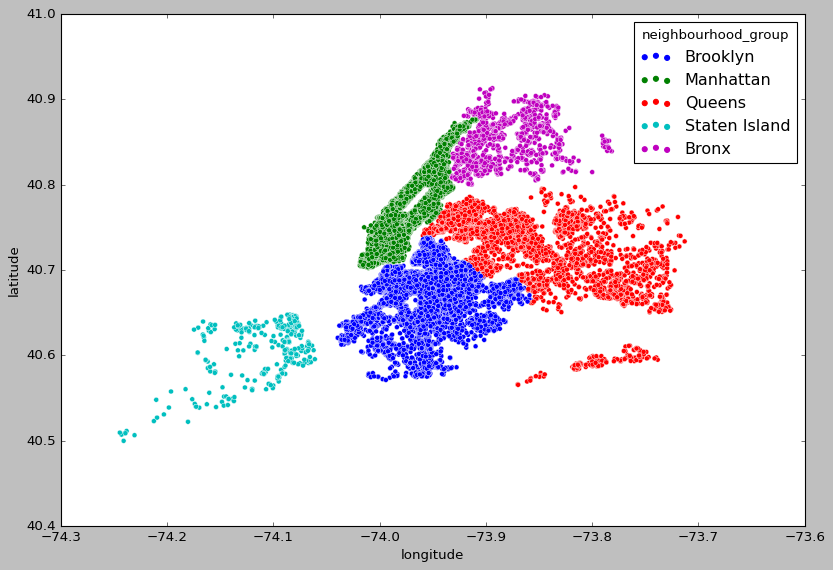

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df.longitude, y = df.latitude , hue = df.neighbourhood_group)
plt.show()

# 13. Lets see the ('John')
Seeing the below latitude and longitude it is clear that it is in the same building.

In [25]:
John_data = df[df['host_name']=='John']
John_data_by = John_data[['host_id','host_name','neighbourhood','latitude','longitude']]
John_data_by.head(5)

,host_id,host_name,neighbourhood,latitude,longitude
0,2787,John,Kensington,40.64749,-73.97237
429,715807,John,Greenwich Village,40.72831,-74.00177
620,1229984,John,Long Island City,40.74581,-73.95295
991,1488809,John,Bushwick,40.70339,-73.92945
1141,2397411,John,Clinton Hill,40.68545,-73.96534


# 14 . Top 10 Shared room 

In [26]:
shared_room = df[df['room_type']=='Shared room']
list_shared_room = shared_room.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name = 'Shared').sort_values(by = 'Shared', ascending = False)
list_shared_room.head()

,host_id,host_name,neighbourhood,Shared
339,39528519,Max,Lower East Side,23
529,119669058,Melissa,Bedford-Stuyvesant,18
651,201015598,Anchor,Bedford-Stuyvesant,17
618,175730239,Baboucarr,Sunnyside,10
663,209386156,Abraham,East Harlem,9


# 15 . Average room rent for locality

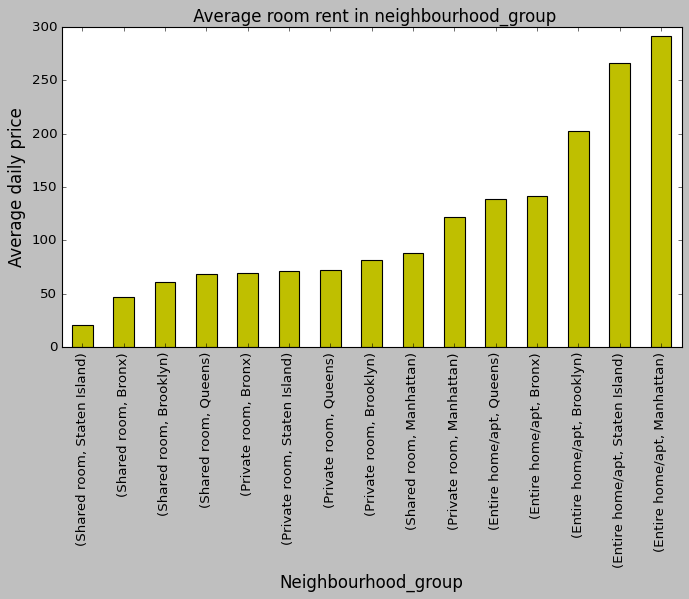

list of average price for per night based on the neighbourhood


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [27]:
min_nights = df[df['minimum_nights']==1]
df_1 = min_nights.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending = True)
df_1.plot(kind = 'bar', color = 'y', figsize = (10,5))
plt.xlabel('Neighbourhood_group', fontsize = 15)
plt.ylabel('Average daily price',fontsize = 15)
plt.title(' Average room rent in neighbourhood_group', fontsize = 15)
plt.show()
print('list of average price for per night based on the neighbourhood')
pd.DataFrame(df_1).sort_values(by = 'room_type')